<a href="https://colab.research.google.com/github/anmolmishra02/datastructuresandalgo/blob/master/Customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Necessary **Modules** 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Importing Dataset 

In [0]:
data=pd.read_csv("https://raw.githubusercontent.com/anmolmishra02/machine-learning/master/WA_Fn-UseC_-Telco-Customer-Churn.csv")
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# EDA

In [0]:
print(data.describe())
print(data.info())


       SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null o

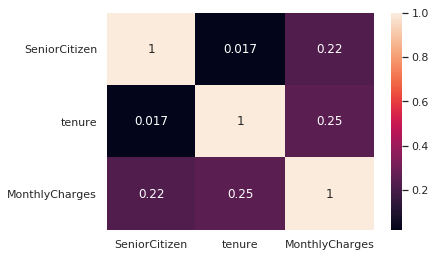

In [0]:
data.corr()
sns.heatmap(data.corr(),annot=True)


# Analysing Total Churn PErcentage

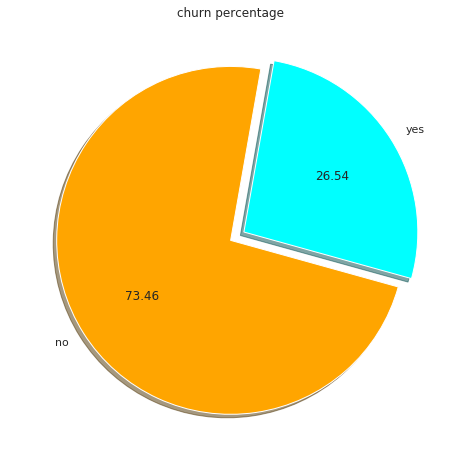

In [0]:
df1=data['Churn'].value_counts()
plt.figure(figsize=(8,8))
plt.title("churn percentage")
explode=(0,0.09)
plt.pie(df1,labels=["no","yes"],autopct='%.2f',colors=["orange","cyan"],shadow=1,startangle=80,explode=explode)
plt.show()

# Converting TotalCharges to numerical type

In [0]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce')
data.dtypes


customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

# Dropping CustomerId colummn As it is of no use

In [0]:
data.drop(['customerID'],axis=1,inplace=True)


In [0]:
data.dropna(inplace=True)
data.shape

(7032, 20)

# Detecting Outliers 

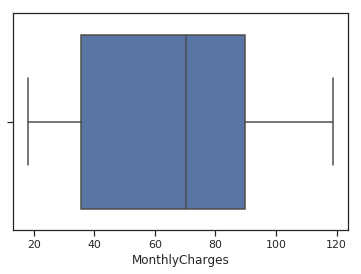

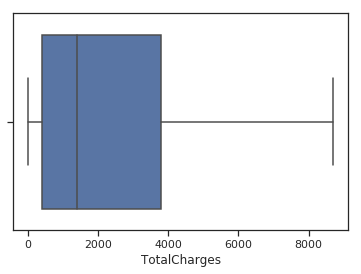

In [0]:
plt.figure()
sns.boxplot(x=data['MonthlyCharges'])
plt.figure()
sns.boxplot(x=data['TotalCharges'])

as we can see that there are no outliers in our dataset , which implies that data has been collected very carefully .

# Data Analysis & Visualization

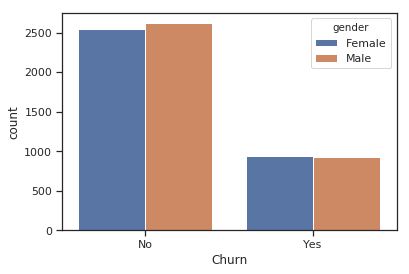

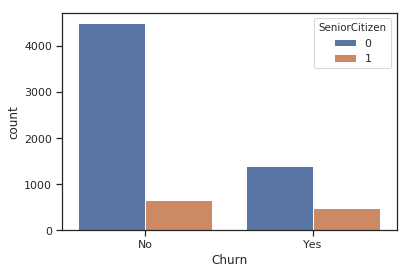

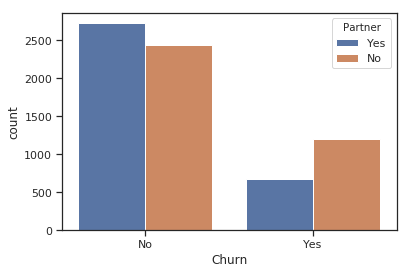

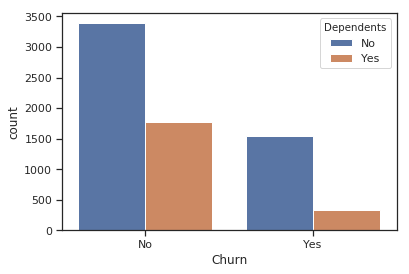

<Figure size 432x288 with 0 Axes>

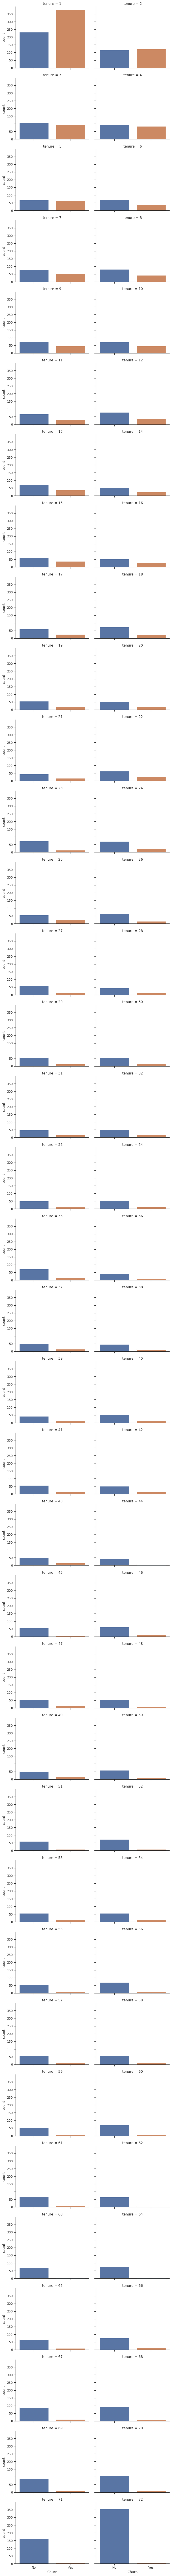

In [0]:
sns.set(style='ticks')
plt.figure()
sns.countplot(x='Churn',hue='gender',data=data)
plt.figure()
sns.countplot(x='Churn',hue='SeniorCitizen',data=data)
plt.figure()
sns.countplot(x='Churn',hue='Partner',data=data)
plt.figure()
sns.countplot(x='Churn',hue='Dependents',data=data)
plt.figure()
sns.catplot('Churn',col='tenure',col_wrap=2,data=data,kind='count',height=3.5,aspect=1.2)

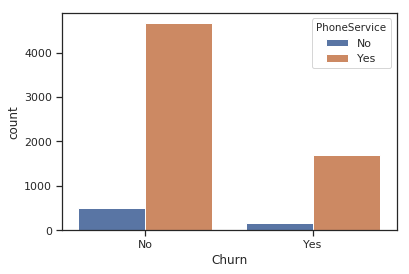

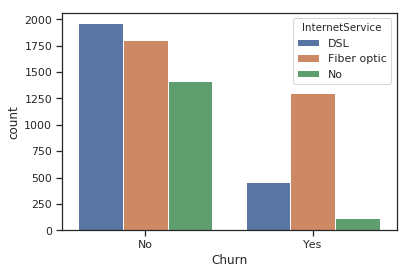

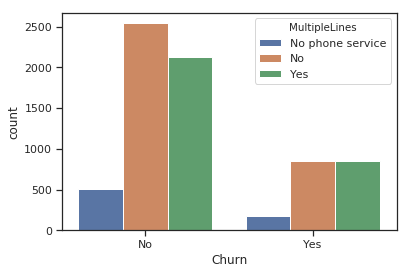

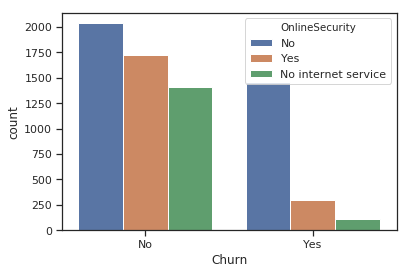

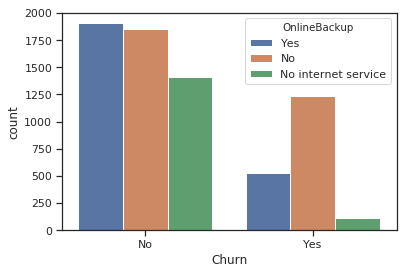

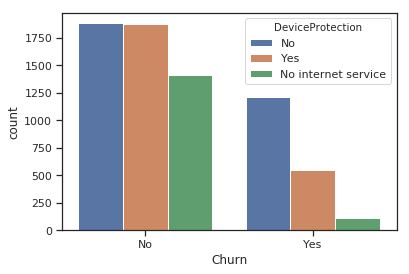

In [0]:
sns.set(style='ticks')
plt.figure()
sns.countplot(x='Churn',hue='PhoneService',data=data)
plt.figure()
sns.countplot(x='Churn',hue='InternetService',data=data)
plt.figure()
sns.countplot(x='Churn',hue='MultipleLines',data=data)
plt.figure()
sns.countplot(x='Churn',hue='OnlineSecurity',data=data)
plt.figure()
sns.countplot(x='Churn',hue='OnlineBackup',data=data)
plt.figure()
sns.countplot(x='Churn',hue='DeviceProtection',data=data)

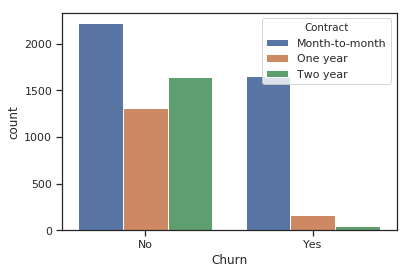

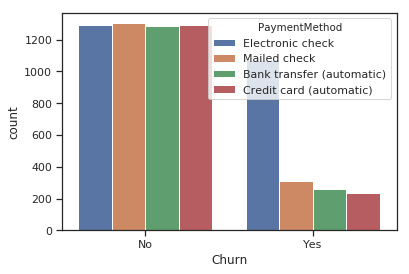

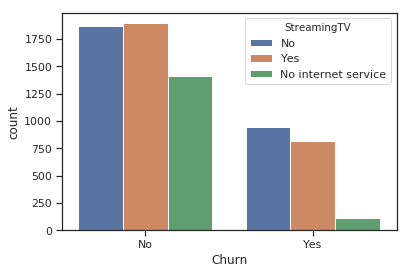

In [0]:
plt.figure()
sns.countplot(x='Churn',hue='Contract',data=data)
plt.figure()
sns.countplot(x='Churn',hue='PaymentMethod',data=data)
plt.figure()
sns.countplot(x='Churn',hue='StreamingTV',data=data)

# Transforming Data using Label Encoder

In [0]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
y=['Dependents','InternetService','gender','Contract','OnlineSecurity','PaymentMethod','Partner','PhoneService','TechSupport','DeviceProtection','StreamingTV','PaperlessBilling']
for x in y:
  data[x]=le.fit_transform(data[[x]])
data.head(5)  

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,No phone service,0,0,Yes,0,0,0,No,0,1,2,29.85,29.85,No
1,1,0,0,0,34,1,No,0,2,No,2,0,0,No,1,0,3,56.95,1889.50,No
2,1,0,0,0,2,1,No,0,2,Yes,0,0,0,No,0,1,3,53.85,108.15,Yes
3,1,0,0,0,45,0,No phone service,0,2,No,2,2,0,No,1,0,0,42.30,1840.75,No
4,0,0,0,0,2,1,No,1,0,No,0,0,0,No,0,1,2,70.70,151.65,Yes


# Splitting the dataset into Train & Test set

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

x=data[['gender','tenure','MonthlyCharges','Dependents','InternetService','Contract','SeniorCitizen','PaymentMethod','Partner','PhoneService','TechSupport','DeviceProtection','PaperlessBilling']].values
y=data['Churn'].values
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# KNN Classifier

In [0]:
nf=KNeighborsClassifier(n_neighbors=10)
nf.fit(x_train,y_train)
p1=nf.predict(x_test)
print(metrics.accuracy_score(y_test,p1))

0.7690120824449183


# optimizing hyperparameters using Grid Search

In [0]:
k_range = list(range(1,31))
weight_options = ["uniform", "distance"]
param_grid = dict(n_neighbors = k_range, weights = weight_options)
grid=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=param_grid,cv = 10, scoring = 'accuracy')
grid.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [0]:
y=grid.predict(x_test)
s1=grid.best_score_
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7959111111111111
{'n_neighbors': 18, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')


# Training and testing using Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier
l1=DecisionTreeClassifier()
l1.fit(x_train,y_train)
y2=l1.predict(x_test)
s2=metrics.accuracy_score(y_test,y2)
print(metrics.accuracy_score(y_test,y2))

0.7263681592039801


# Logistic Regression

In [0]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
s3=metrics.accuracy_score(y_test,y_pred)
print(metrics.accuracy_score(y_test,y_pred))
print(lr.coef_)

0.7974413646055437
[[-0.01904323 -0.03755276  0.03111862 -0.28046053  0.28235522 -0.77942246
   0.31342759  0.05188628  0.06606614 -1.11013223 -0.30508325 -0.05953666
   0.32546486]]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
print(metrics.classification_report(y_test,y_pred))


In [0]:
print(metrics.confusion_matrix(y_test,y_pred))

[[937  99]
 [158 215]]


In [0]:
srs=pd.DataFrame(y_test)
srs.columns=["actual churn value"]
srs.head(8)

,actual churn value
0,No
1,No
2,Yes
3,No
4,No
5,No
6,No
7,No


In [0]:
dp=pd.DataFrame(y_pred)
dp.columns=["predicted churn value"]
dp.head(8)

,predicted churn value
0,No
1,No
2,Yes
3,No
4,No
5,No
6,No
7,Yes


# Accuracy vs Classifier

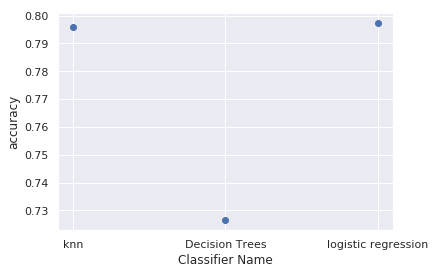

In [0]:
x=["knn","Decision Trees","logistic regression"]
y=[s1,s2,s3]
plt.plot(x,y,'bo')
plt.xlabel("Classifier Name")
plt.ylabel("accuracy")
plt.show()